# Chargement des données :

In [1]:
import pandas as pd
pd.options.display.max_rows = 10

In [2]:
mock_no_overtake = pd.DataFrame([
        # tripA, tripB, tripC don't overtake any trip (nor are they overtaken by any trip) :
        ["tripA", "14:10:00", "14:10:00", "stop1", 0],
        ["tripA", "14:20:00", "14:20:00", "stop2", 1],
        ["tripA", "14:30:00", "14:30:00", "stop3", 2],
        ["tripB", "15:10:00", "15:10:00", "stop1", 0],
        ["tripB", "15:20:00", "15:20:00", "stop2", 1],
        ["tripB", "15:30:00", "15:30:00", "stop3", 2],
        ["tripC", "16:10:00", "16:10:00", "stop1", 0],
        ["tripC", "16:20:00", "16:20:00", "stop2", 1],
        ["tripC", "16:30:00", "16:30:00", "stop3", 2],
    ],
    columns=["trip_id", "arrival_time", "departure_time", "stop_id", "stop_sequence"],
)
mock_no_overtake

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,tripA,14:10:00,14:10:00,stop1,0
1,tripA,14:20:00,14:20:00,stop2,1
2,tripA,14:30:00,14:30:00,stop3,2
3,tripB,15:10:00,15:10:00,stop1,0
4,tripB,15:20:00,15:20:00,stop2,1
5,tripB,15:30:00,15:30:00,stop3,2
6,tripC,16:10:00,16:10:00,stop1,0
7,tripC,16:20:00,16:20:00,stop2,1
8,tripC,16:30:00,16:30:00,stop3,2


In [3]:
mock_with_overtake = pd.DataFrame([
        # tripA doesn't overtake any trip (nor is it overtaken by any trip) :
        ["tripA", "14:10:00", "14:10:00", "stop10", 0],
        ["tripA", "14:20:00", "14:20:00", "stop20", 1],
        ["tripA", "14:30:00", "14:30:00", "stop30", 2],
    
        # tripB overtakes tripC :
        ["tripB", "15:10:00", "15:10:00", "stop10", 0],
        ["tripB", "15:20:00", "15:20:00", "stop20", 1],
        ["tripB", "15:30:00", "15:30:00", "stop30", 2],
    
        # tripC is overtaken by tripB :
        ["tripC", "15:15:00", "15:15:00", "stop10", 0],
        ["tripC", "15:18:00", "15:18:00", "stop20", 1],
        ["tripC", "15:28:00", "15:28:00", "stop30", 2],
    ],
    columns=["trip_id", "arrival_time", "departure_time", "stop_id", "stop_sequence"],
)
mock_with_overtake

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,tripA,14:10:00,14:10:00,stop10,0
1,tripA,14:20:00,14:20:00,stop20,1
2,tripA,14:30:00,14:30:00,stop30,2
3,tripB,15:10:00,15:10:00,stop10,0
4,tripB,15:20:00,15:20:00,stop20,1
5,tripB,15:30:00,15:30:00,stop30,2
6,tripC,15:15:00,15:15:00,stop10,0
7,tripC,15:18:00,15:18:00,stop20,1
8,tripC,15:28:00,15:28:00,stop30,2


In [4]:
limit_rows = 20000
# limit_rows = None
from_stop_times = pd.read_csv("/tmp/stop_times.txt", nrows=limit_rows)
from_stop_times.drop(["stop_time_desc", "pickup_type", "drop_off_type"], axis=1, inplace=True)

In [5]:
df = from_stop_times
# df = mock_no_overtake
# df = mock_with_overtake


# itérer sur la dataframe doit permettre de reconstruire chaque trip :
df.sort_values(["departure_time", "arrival_time", "trip_id", "stop_sequence"])
df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,125830582-1_406672,10:27:00,10:27:00,StopPoint:50162949,0
1,125830582-1_406672,10:29:00,10:29:00,StopPoint:50162933,1
2,125830582-1_406672,10:30:00,10:30:00,StopPoint:50162935,2
3,125830582-1_406672,10:32:00,10:32:00,StopPoint:50162925,3
4,125830582-1_406672,10:34:00,10:34:00,StopPoint:50162941,4
...,...,...,...,...,...
19995,126784613-1_406487,18:13:00,18:13:00,StopPoint:101:4052,19
19996,126784613-1_406487,18:14:00,18:14:00,StopPoint:101:4071,20
19997,126784613-1_406487,18:16:00,18:16:00,StopPoint:101:4058,21
19998,126784438-1_406488,09:57:00,09:57:00,StopPoint:101:4068,0


# Premier trip :

In [6]:
first_trip_id = df.loc[0]["trip_id"]
first_trip_id

'125830582-1_406672'

In [7]:
first_trip_rows = df[df["trip_id"] == first_trip_id]
first_trip_rows

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,125830582-1_406672,10:27:00,10:27:00,StopPoint:50162949,0
1,125830582-1_406672,10:29:00,10:29:00,StopPoint:50162933,1
2,125830582-1_406672,10:30:00,10:30:00,StopPoint:50162935,2
3,125830582-1_406672,10:32:00,10:32:00,StopPoint:50162925,3
4,125830582-1_406672,10:34:00,10:34:00,StopPoint:50162941,4
...,...,...,...,...,...
12,125830582-1_406672,10:48:00,10:48:00,StopPoint:50162957,12
13,125830582-1_406672,10:50:00,10:50:00,StopPoint:50162951,13
14,125830582-1_406672,10:52:00,10:52:00,StopPoint:50162929,14
15,125830582-1_406672,10:54:00,10:54:00,StopPoint:50162939,15


# Calcul des infos de chaque trip : nombre de stops + route_label

In [8]:
grouped_by_trip_id = df.groupby("trip_id", group_keys=False)
# les rows ont déjà été triées plus haut par "trip_id" (avec "stop_sequence" comme critère secondaire)
trips = grouped_by_trip_id["stop_id"].aggregate(["size", lambda x: "|".join(x)])
# le route_label est la concaténation des ids de chaque stop du trip, séparé par "|"
trips.columns = ["nb_stops", "route_label"]
trips
# à ce stade, pour chaque trip_id, on sait retrouver son nombre de stops, et son route_label

,nb_stops,route_label
trip_id,,
125830456-1_406678,19,StopPoint:50162949|StopPoint:50162933|StopPoin...
125830457-1_407019,19,StopPoint:50162948|StopPoint:50162954|StopPoin...
125830458-1_406679,19,StopPoint:50162949|StopPoint:50162933|StopPoin...
125830459-1_407020,19,StopPoint:50162948|StopPoint:50162954|StopPoin...
125830460-1_406680,19,StopPoint:50162949|StopPoint:50162933|StopPoin...
...,...,...
126785144-1_406603,16,StopPoint:102:3002|StopPoint:102:3038|StopPoin...
126785145-1_406604,16,StopPoint:102:3002|StopPoint:102:3038|StopPoin...
126785146-1_406605,16,StopPoint:102:3002|StopPoint:102:3038|StopPoin...


# Mise à jour de la dataframe initiale pour ajouter le nombre de stops et le route_label

In [9]:
# mute la dataframe pour ajouter le nombre de stops de chaque trip :
nb_stops = df["trip_id"].apply(lambda trip_id: trips.loc[trip_id]["nb_stops"])
df["nb_stops_in_this_trip"] = nb_stops
# mute la dataframe pour ajouter le route_label de chaque trip :
df["route_label"] = df["trip_id"].apply(lambda trip_id: trips.loc[trip_id]["route_label"])

df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,nb_stops_in_this_trip,route_label
0,125830582-1_406672,10:27:00,10:27:00,StopPoint:50162949,0,17,StopPoint:50162949|StopPoint:50162933|StopPoin...
1,125830582-1_406672,10:29:00,10:29:00,StopPoint:50162933,1,17,StopPoint:50162949|StopPoint:50162933|StopPoin...
2,125830582-1_406672,10:30:00,10:30:00,StopPoint:50162935,2,17,StopPoint:50162949|StopPoint:50162933|StopPoin...
3,125830582-1_406672,10:32:00,10:32:00,StopPoint:50162925,3,17,StopPoint:50162949|StopPoint:50162933|StopPoin...
4,125830582-1_406672,10:34:00,10:34:00,StopPoint:50162941,4,17,StopPoint:50162949|StopPoint:50162933|StopPoin...
...,...,...,...,...,...,...,...
19995,126784613-1_406487,18:13:00,18:13:00,StopPoint:101:4052,19,22,StopPoint:101:4073|StopPoint:101:4104|StopPoin...
19996,126784613-1_406487,18:14:00,18:14:00,StopPoint:101:4071,20,22,StopPoint:101:4073|StopPoint:101:4104|StopPoin...
19997,126784613-1_406487,18:16:00,18:16:00,StopPoint:101:4058,21,22,StopPoint:101:4073|StopPoint:101:4104|StopPoin...
19998,126784438-1_406488,09:57:00,09:57:00,StopPoint:101:4068,0,2,StopPoint:101:4068|StopPoint:101:4110


## Analyse du nombre de stops

array([[<AxesSubplot:title={'center':'nb_stops'}>]], dtype=object)

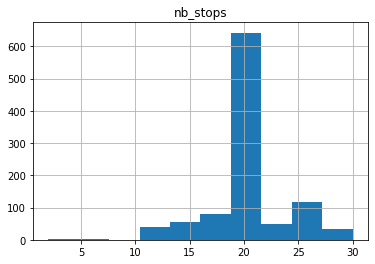

In [10]:
trips.hist("nb_stops")

**Interprétation**: on voit que la majorité des trips du (petit) subset analysé ont 19 stops (mais une poignée en ont 17 ou 16).

----

# À partir de maintenant, on s'intéresse aux trips de la première route

In [11]:
grouped = df.groupby("route_label")
grouped.describe(include="all")

print("There are {} groups".format(grouped.ngroups))
print("")

route_label, data = next(iter(grouped))
print("FIRST ROUTE_LABEL = ", route_label)
print("")
data.set_index("trip_id", inplace=True)
data.head(20)

There are 16 groups

FIRST ROUTE_LABEL =  StopPoint:101:4040|StopPoint:101:4037|StopPoint:101:4032|StopPoint:101:4030|StopPoint:101:4057|StopPoint:101:4070|StopPoint:101:4062|StopPoint:101:4051|StopPoint:101:4050|StopPoint:101:4053|StopPoint:101:4063|StopPoint:101:4048|StopPoint:101:4059|StopPoint:101:4049|StopPoint:101:4054|StopPoint:101:4061|StopPoint:101:4060|StopPoint:101:4055|StopPoint:101:4067



,arrival_time,departure_time,stop_id,stop_sequence,nb_stops_in_this_trip,route_label
trip_id,,,,,,
126784437-1_406393,09:07:00,09:07:00,StopPoint:101:4040,0,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...
126784437-1_406393,09:08:00,09:08:00,StopPoint:101:4037,1,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...
126784437-1_406393,09:09:00,09:09:00,StopPoint:101:4032,2,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...
126784437-1_406393,09:11:00,09:11:00,StopPoint:101:4030,3,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...
126784437-1_406393,09:15:00,09:15:00,StopPoint:101:4057,4,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...
...,...,...,...,...,...,...
126784437-1_406393,09:33:00,09:33:00,StopPoint:101:4061,15,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...
126784437-1_406393,09:35:00,09:35:00,StopPoint:101:4060,16,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...
126784437-1_406393,09:36:00,09:36:00,StopPoint:101:4055,17,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...


## on va ranker les trips par l'heure de leur premier départ :

In [12]:
trip_departure_times = data[data["stop_sequence"] == 0]
trip_departure_times = trip_departure_times["departure_time"].sort_values()
trip_departure_times

trip_id
126784437-1_406393    09:07:00
126784439-1_406394    10:34:00
126784518-1_406396    14:14:00
126784520-1_406397    15:18:00
126784446-1_406395    18:14:00
Name: departure_time, dtype: object

In [13]:
# given a specific route, a trip is ranked N if its the nth earliest trip to depart
# trip with rank 1 is the first to depart in the morning, trip with rank N is the last
trip_ranks = trip_departure_times.rank().astype(int)
data["departure_rank"] = trip_ranks
data

,arrival_time,departure_time,stop_id,stop_sequence,nb_stops_in_this_trip,route_label,departure_rank
trip_id,,,,,,,
126784437-1_406393,09:07:00,09:07:00,StopPoint:101:4040,0,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,1
126784437-1_406393,09:08:00,09:08:00,StopPoint:101:4037,1,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,1
126784437-1_406393,09:09:00,09:09:00,StopPoint:101:4032,2,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,1
126784437-1_406393,09:11:00,09:11:00,StopPoint:101:4030,3,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,1
126784437-1_406393,09:15:00,09:15:00,StopPoint:101:4057,4,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,1
...,...,...,...,...,...,...,...
126784520-1_406397,15:40:00,15:40:00,StopPoint:101:4054,14,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,4
126784520-1_406397,15:41:00,15:41:00,StopPoint:101:4061,15,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,4
126784520-1_406397,15:42:00,15:42:00,StopPoint:101:4060,16,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,4


**À ce stade**, la column `departure_rank` contient le rank du trip : si `A > B`, le trip de rank `A` part **après** le trip de rank `B`.

In [14]:
nb_stops = data["nb_stops_in_this_trip"].iat[0]

# there should be precisely as much rows as nb_stops x max_departure_rank :
assert len(data.index) == nb_stops *  data["departure_rank"].max()
nb_stops

19

In [15]:
data2 = data.sort_values(["departure_rank", "stop_sequence"])
data2

,arrival_time,departure_time,stop_id,stop_sequence,nb_stops_in_this_trip,route_label,departure_rank
trip_id,,,,,,,
126784437-1_406393,09:07:00,09:07:00,StopPoint:101:4040,0,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,1
126784437-1_406393,09:08:00,09:08:00,StopPoint:101:4037,1,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,1
126784437-1_406393,09:09:00,09:09:00,StopPoint:101:4032,2,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,1
126784437-1_406393,09:11:00,09:11:00,StopPoint:101:4030,3,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,1
126784437-1_406393,09:15:00,09:15:00,StopPoint:101:4057,4,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,1
...,...,...,...,...,...,...,...
126784446-1_406395,18:36:00,18:36:00,StopPoint:101:4054,14,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,5
126784446-1_406395,18:37:00,18:37:00,StopPoint:101:4061,15,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,5
126784446-1_406395,18:38:00,18:38:00,StopPoint:101:4060,16,19,StopPoint:101:4040|StopPoint:101:4037|StopPoin...,5


**À ce stade**, les lignes d'un même trip sont consécutives (tri par `stop_sequence`), et les différents trips sont classés par leur heure de premier départ (tri par `departure_rank`).

In [16]:
for stop_i in range(nb_stops):
    print(data2[data2["stop_sequence"] == stop_i]["departure_time"].is_monotonic)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


# Ici, je cherche à faire la même chose sur TOUTES les routes

In [17]:
from collections import Counter

df2 = df.set_index("trip_id")
df2.sort_values(["departure_time", "arrival_time", "stop_sequence"])

def timestring_to_seconds(timestring: str) -> int:
    tokens = timestring.split(":")
    return 3600 * int(tokens[0]) + 60 * int(tokens[1]) + int(tokens[2])

df2["departure_time_sec"] = df2["departure_time"].transform(timestring_to_seconds)
df2


grouped = df2.groupby("route_label")
print("There are {} groups".format(grouped.ngroups))
print("")

# en fait, je peux considérer que le GroupObject est ma liste de routes :
# j'accède à la DataFrame d'une route donnée via get_group
# et j'itère sur toutes les routes (il y a peut-être plus efficace) :
nb_routes_with_overtakes = 0
nb_routes_without_overtakes = 0
for route_label, data in grouped:
    trip_departure_times = data[data["stop_sequence"] == 0]
    trip_departure_times = trip_departure_times["departure_time"].sort_values()
    trip_departure_times

    # given a specific route, a trip is ranked N if its the nth earliest trip to depart
    # trip with rank 1 is the first to depart in the morning, trip with rank N is the last
    trip_ranks = trip_departure_times.rank().astype(int)
    data.insert(1, "departure_rank", trip_ranks)
    # **À ce stade**, la column `departure_rank` contient le rank du trip : si `A > B`, le trip de rank `A` part **après** le trip de rank `B`.
    
    data2 = data.sort_values(["departure_time"])
    
    nb_stops = data2["nb_stops_in_this_trip"].iat[0]

    # pour une route donnée, un trip est identifié par son departure_rank de 1 à N (où N = nombre de trips dans la route)
    # à un stop donné, si on classe les trips par leur heure de passage à ce stop, on obtient "stop_trip_sequence"
    # sur une route SANS overtake, tous les "stop_trip_sequence" des différents stops sont identiques
    # (dit autrement : sur une route sans overtake, les trips passent tous dans le même ordre = leur departure_rank)
    # sur une route AVEC overtake, les "stop_trip_sequence" de différents stops sont différents
    # (dit autrement : les trips passent dans un certain order à un stop A, et dans un ordre différent à un stop B)
    route_trip_sequences = list()
    for stop_num in range(nb_stops):
        stop_data = data2[data2["stop_sequence"] == stop_num]
        stop_has_overtake = not stop_data["departure_rank"].is_monotonic
        stop_trip_sequence = stop_data["departure_rank"].astype(str).str.cat(sep="|")
        route_trip_sequences.append(stop_trip_sequence)

    counter = Counter(route_trip_sequences)
    if len(counter) >= 2:
        print("")
        print("ROUTE {} has overtake !".format(route_label))
        for trip_sequence, count in counter.items():
            print("==={}=== {}".format(count, trip_sequence))
        nb_routes_with_overtakes += 1
    else:
        nb_routes_without_overtakes += 1

print("")
print("On {} routes in total, there are :".format(grouped.ngroups))
print("\t{} routes WITH    overtakes".format(nb_routes_with_overtakes))
print("\t{} routes WITHOUT overtakes".format(nb_routes_without_overtakes))

There are 16 groups


ROUTE StopPoint:101:4040|StopPoint:101:4037|StopPoint:101:4032|StopPoint:101:4030|StopPoint:101:4057|StopPoint:101:4070|StopPoint:101:4062|StopPoint:101:4051|StopPoint:101:4050|StopPoint:101:4053|StopPoint:101:4063|StopPoint:101:4048|StopPoint:101:4059|StopPoint:101:4049|StopPoint:101:4054|StopPoint:101:4061|StopPoint:101:4060|StopPoint:101:4055|StopPoint:101:4067|StopPoint:101:4080|StopPoint:101:4075|StopPoint:101:4106|StopPoint:101:4099|StopPoint:101:4093|StopPoint:101:4085|StopPoint:101:4108|StopPoint:101:4101|StopPoint:101:4088|StopPoint:101:4103|StopPoint:101:4073 has overtake !
===17=== 1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|31|32|33|34
===7=== 1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|22|21|23|24|25|26|27|28|29|30|31|32|33|34
===6=== 1|2|3|4|5|6|7|8|9|10|11|13|12|14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|31|32|33|34

ROUTE StopPoint:101:4057|StopPoint:101:4070|StopPoint:101:4062|StopPoint:101:4051|